# 0. Import Packages

Load the necessary packages

In [ ]:
# Install matplotlib version 3.4.2 and then restart runtime
#! pip install matplotlib==3.4.2 

In [ ]:
# Install imbalanced and scikit
! pip install -U imbalanced-learn
! pip install scikit-plot

     |████████████████████████████████| 189 kB 5.4 MB/s 
     |████████████████████████████████| 23.2 MB 1.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
# Load
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn import metrics
from lightgbm import LGBMClassifier
import xgboost as xgb
import scikitplot as skplt

# 1. Load Data

### Data directory

In [ ]:
# Connect to folders in Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load data into a dataframe

In [ ]:
train = pd.read_csv(".../train.csv")
test = pd.read_csv(".../test.csv")

In [ ]:
# Show the first 5 rows of the train dataframe
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [ ]:
# Show the first 5 rows of the test dataframe
test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [ ]:
# Number of rows and columns of both data sets
train.shape, test.shape

((3333, 20), (1667, 20))

# 2. General statistics of both dataframes

### Data types

In [ ]:
# Look at the data type of the train dataframe
pd.DataFrame({"Data type": train.dtypes})

,Data type
state,object
account_length,int64
area_code,object
international_plan,object
voice_mail_plan,object
number_vmail_messages,int64
total_day_minutes,float64
total_day_calls,int64
total_day_charge,float64
total_eve_minutes,float64


In [ ]:
# Look at the data type of the test dataframe
pd.DataFrame({"Data type": test.dtypes})

,Data type
state,object
account_length,int64
area_code,object
international_plan,object
voice_mail_plan,object
number_vmail_messages,int64
total_day_minutes,float64
total_day_calls,int64
total_day_charge,float64
total_eve_minutes,float64


### Dataframe statistics

In [ ]:
# Look at the basic statistics of the train dataframe
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


From the above table, we detect nothing abnormally (the minimum of all numeric variables are non-negative, which makes sense in the context).

### Missing data

We will check to see if there is any missing values in the train dataframe.

In [ ]:
pd.DataFrame({"Missing values (%)": train.isnull().sum()/len(train.index)*100})

,Missing values (%)
state,0.0
account_length,0.0
area_code,0.0
international_plan,0.0
voice_mail_plan,0.0
number_vmail_messages,0.0
total_day_minutes,0.0
total_day_calls,0.0
total_day_charge,0.0
total_eve_minutes,0.0


From the above summary table, there is no missing value in the train data set.

### Duplicates

In [ ]:
train[train.duplicated()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


There are no duplicates in the train dataframe.

# 3. Data Visualization

## Churn - Dependent Variable

We'll first look at the churning rate.



In [ ]:
# Add an id column
train["id"] = train.index + 1

# Reorder id column to be the first column
cols = train.columns.tolist() # retrieve a list of column
cols = cols[-1:] + cols[:-1] # move the "id" column to the first position in the cols list
train = train[cols] # move columns

In [ ]:
# Create churn dataframe
churn = train[["id", "churn"]]

# Rename a column: id -> Customers, churn -> Churn
churn.columns = ["Customers", "Churn"]
churn.head(3)

,Customers,Churn
0,1,no
1,2,no
2,3,no


In [ ]:
def stacked_bar_plot(df, titl, rot_=0, save=False, fileName_="", xlabel_=""):
  '''
  Plot a stacked bar chart
  '''
  ax = df.plot(kind='bar', stacked=True, figsize=(12, 8), rot=rot_, fontsize=15)
  
  # Set label the x, y, and title
  ax.set_xlabel(xlabel_, fontsize=15)
  ax.set_ylabel("Percentage of customers", fontsize=15)
  ax.set_title(titl, fontsize=20, fontweight="bold")
  
  # Rename legend
  plt.legend(["Retention", "Churn"], loc="upper left", bbox_to_anchor=(1,1), fontsize='x-large')

  # Calculate the position to set the label inside the stack bar chart
  for c in ax.containers:
    ax.bar_label(c, label_type='center', color="white", size=15, fontweight="bold")

  # Save the image
  if save:
    plt.savefig(fileName_)

  plt.show()

In [ ]:
# Calcualte the churn percentage
churn_count = churn.groupby(churn["Churn"]).count() # Count the number of customers by category (churn or retention)
churn_perc = round(churn_count/len(churn)*100, 2)
churn_perc

,Customers
Churn,
no,85.51
yes,14.49


In [ ]:
churn_perc.transpose()

Churn,no,yes
Customers,85.51,14.49


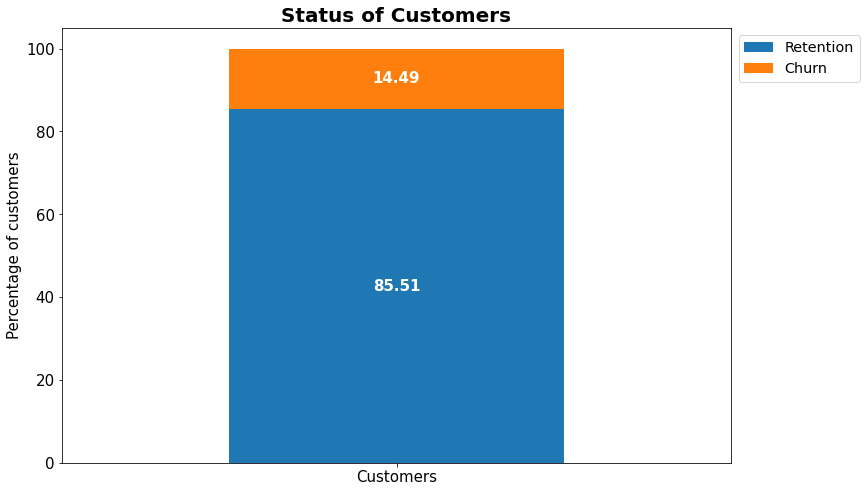

In [ ]:
stacked_bar_plot(df=churn_perc.transpose(), titl="Status of Customers")

From the plot, approximately 14.5% of the registered customers have churned. This seems to be right statistics. However, we can clearly observe an imbalanced data set.

## Independent Variables

### Categorical variables

#### Geographic (state, area_code)

**State**

In [ ]:
def churn_perc_calculation(dataframe, column):
  '''
  Return the percentage of each category in a column by churn variable
  '''

  # Count the number of customers who have churned and retented
  dataframe = dataframe.groupby([dataframe[column], dataframe["churn"]])["id"].count().unstack(level=1)

  # Calculate the percentage of churn and retention
  churn_perc = (round(dataframe.div(dataframe.sum(axis=1), axis=0)*100,2)).sort_values(by=['yes'], ascending=False)

  return churn_perc

In [ ]:
# Define a column that contains id, state, and churn variable
states_df = train[["id", "state", "churn"]]

# Calculate the percentage of churn and retention
churn_by_state = churn_perc_calculation(states_df, "state")
churn_by_state.head()

churn,no,yes
state,,
NJ,73.53,26.47
CA,73.53,26.47
TX,75.00,25.00
MD,75.71,24.29
SC,76.67,23.33


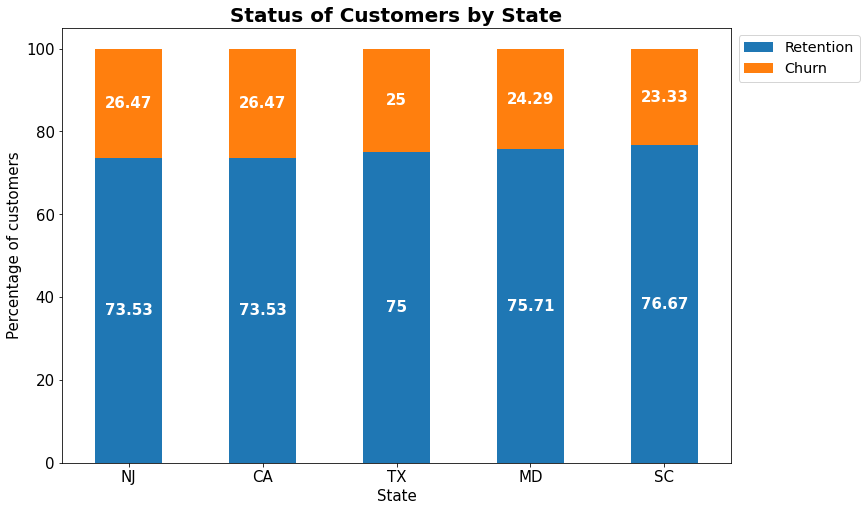

In [ ]:
# Plot the top 5 of states which had the highest churned rate
stacked_bar_plot(df=churn_by_state.head(5), titl="Status of Customers by State", xlabel_="State")

**area_code**

In [ ]:
# Define a dataframe that contains id, area_code, and churn column
area_code_df = train[["id", "area_code", "churn"]]

# Calculate churn and retention percentage
churn_by_area_code = churn_perc_calculation(area_code_df, column="area_code")
churn_by_area_code

churn,no,yes
area_code,,
area_code_510,85.12,14.88
area_code_408,85.44,14.56
area_code_415,85.74,14.26


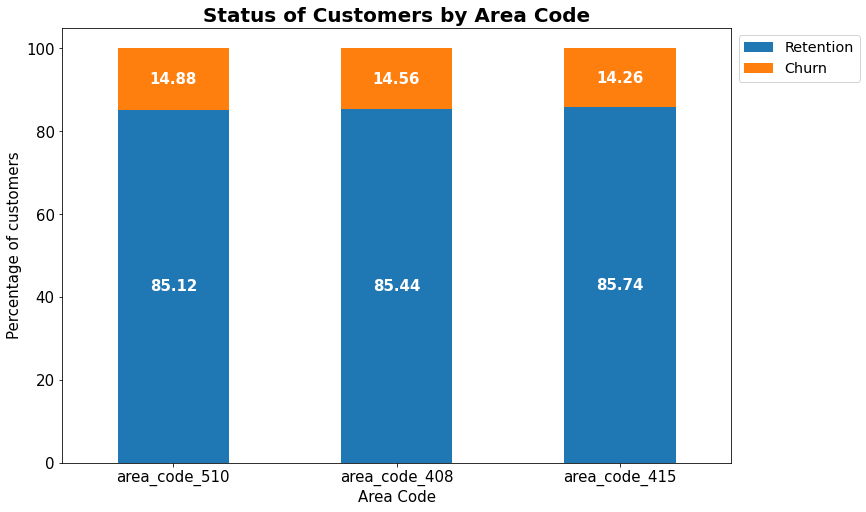

In [ ]:
# Plot custuomers' status by area code
stacked_bar_plot(df=churn_by_area_code, titl="Status of Customers by Area Code", xlabel_="Area Code")

### Plan (international_plan, voice_mail_plan)

**international_plan**

In [ ]:
# Define a dataframe that contain the id, international_plan, and churn variable
international_plan_df = train[["id", "international_plan", "churn"]]

# Calculate the churn and retention percentage
churn_by_international_plan = churn_perc_calculation(international_plan_df, column="international_plan")
churn_by_international_plan

churn,no,yes
international_plan,,
yes,57.59,42.41
no,88.50,11.50


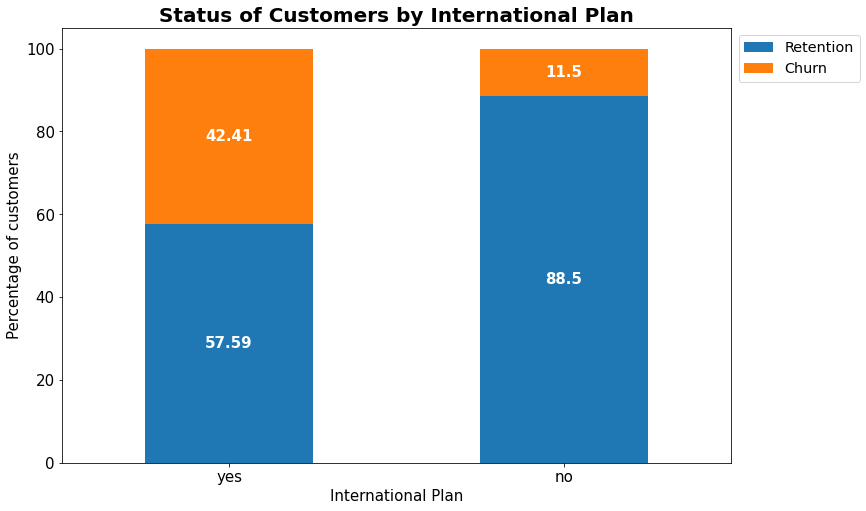

In [ ]:
# Plot the status of customer by international paln
stacked_bar_plot(df=churn_by_international_plan, titl="Status of Customers by International Plan", xlabel_="International Plan")

**voice_mail_plan**

In [ ]:
# Define a dataframe that contains id, voice_mail_plan, and churn variable
voice_mail_plan_df =  train[["id", "voice_mail_plan", "churn"]]

# Calculate the retention and churn percentage
churn_by_voice_mail_plan = churn_perc_calculation(voice_mail_plan_df, column="voice_mail_plan")
churn_by_voice_mail_plan

churn,no,yes
voice_mail_plan,,
no,83.28,16.72
yes,91.32,8.68


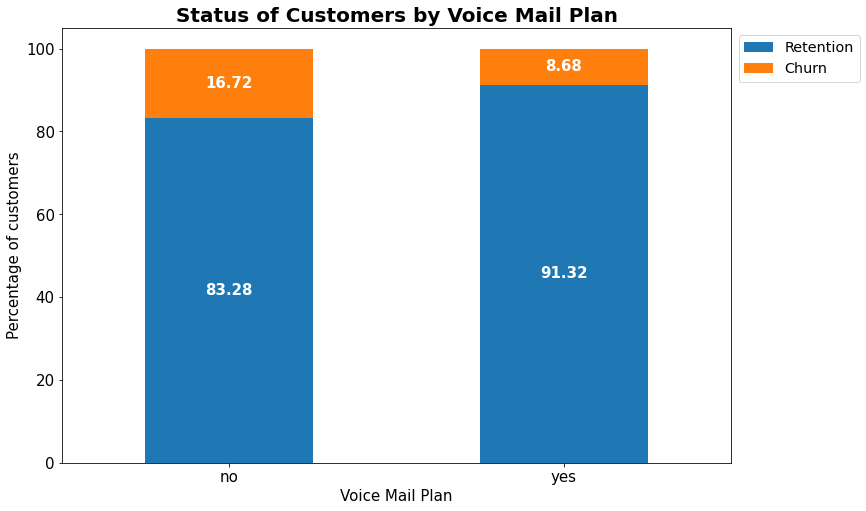

In [ ]:
# Plot the customers' status by voice mail plan
stacked_bar_plot(df=churn_by_voice_mail_plan, titl="Status of Customers by Voice Mail Plan", xlabel_="Voice Mail Plan")

### Numeric variables

### Call duration

In [ ]:
def plot_distribution(dataframe, column, bins_=30, xlabel_=""):
  '''
  Plot a distribution of a numeric variable (a stacked histogram)
  '''
  fig, ax = plt.subplots(figsize=(12,8))
  
  # Create a temporary dataframe with the data to be plot
  temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]=="no"][column],
                       "Churn":dataframe[dataframe["churn"]=="yes"][column]})
  
  # Plot the histogram
  temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)

  # Rename legend
  plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize='x-large')

  # Label x-axis, y-axis, and the title of the plot
  ax.set_xlabel(xlabel_, fontsize=15)
  ax.set_ylabel("Frequency", fontsize=15)
  ax.set_title("Distribution of " + xlabel_.lower(), fontsize=20, fontweight="bold")

  # Change the x-axis to plain style
  ax.ticklabel_format(style='plain', axis='x')

  plt.show()

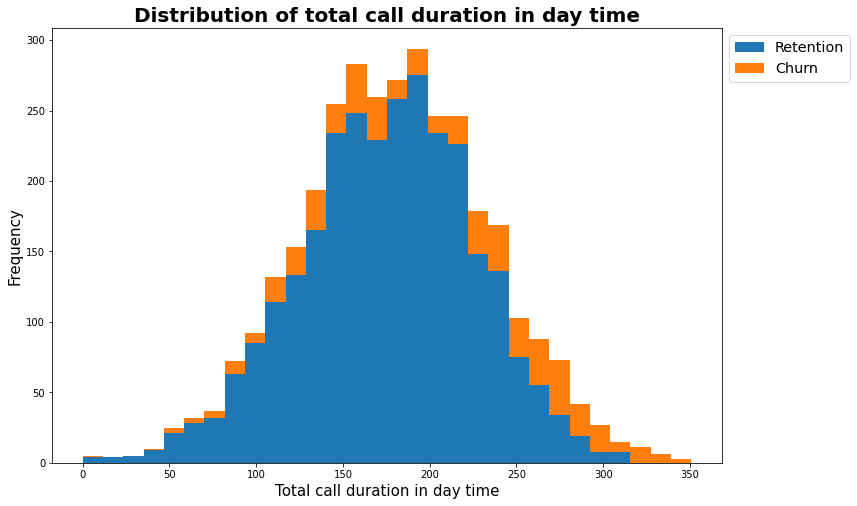

In [ ]:
# Plot the distribution of total_day_minutes variable
plot_distribution(train, "total_day_minutes", xlabel_="Total call duration in day time")

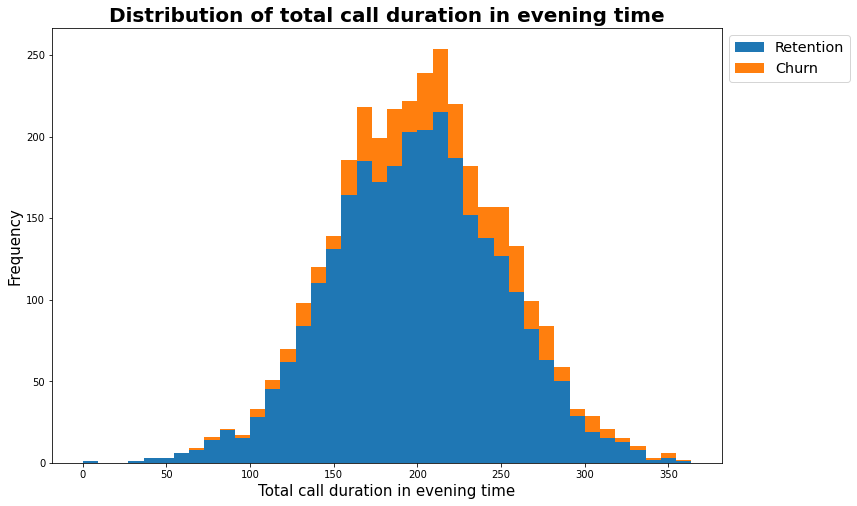

In [ ]:
# Plot the distribution of total_eve_minutes variable
plot_distribution(train, "total_eve_minutes", bins_=40, xlabel_="Total call duration in evening time")

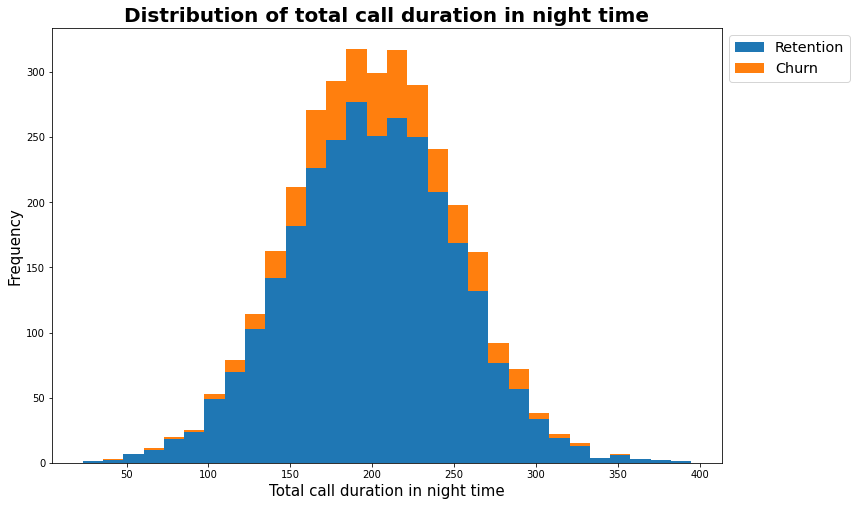

In [ ]:
# Plot the distribution of total_night_minutes variable
plot_distribution(train, "total_night_minutes", xlabel_="Total call duration in night time")

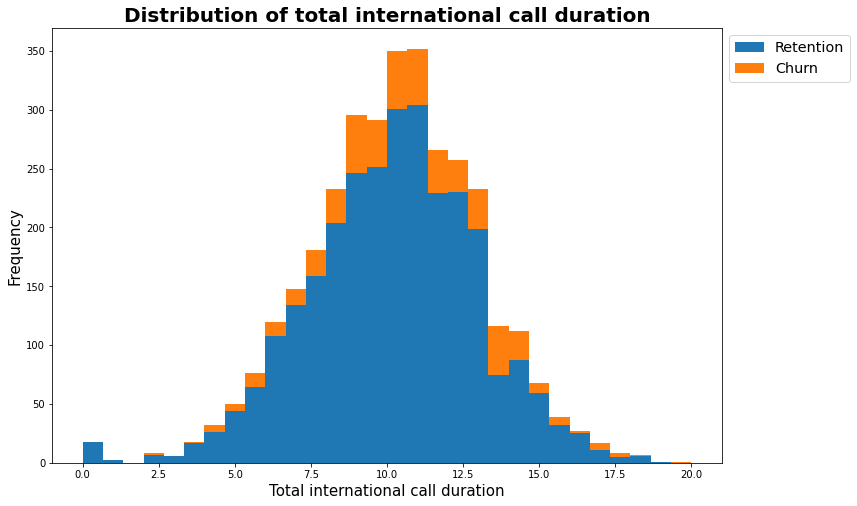

In [ ]:
# Plot the distribution of total_intl_minutes variable
plot_distribution(train, "total_intl_minutes", xlabel_="Total international call duration")

**Plot the distribution using boxplot**

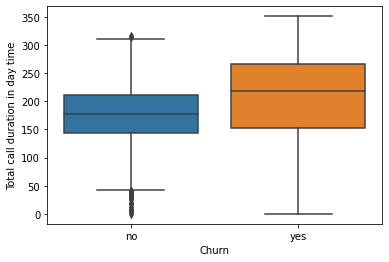

In [ ]:
# Plot the distribution of total_day_minutes variable using boxplot
sns.boxplot(x="churn", y="total_day_minutes", data=train).set(xlabel='Churn', ylabel='Total call duration in day time');

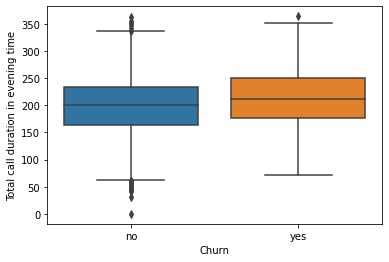

In [ ]:
# Plot the distribution of total_eve_minutes variable using boxplot
sns.boxplot(x="churn", y="total_eve_minutes", data=train).set(xlabel='Churn', ylabel='Total call duration in evening time');

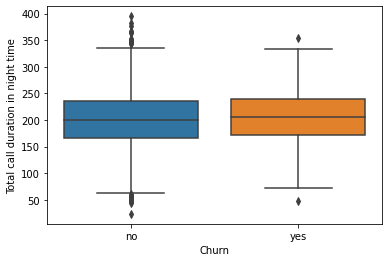

In [ ]:
# Plot the distribution of total_night_minutes variable using boxplot
sns.boxplot(x="churn", y="total_night_minutes", data=train).set(xlabel='Churn', ylabel='Total call duration in night time');

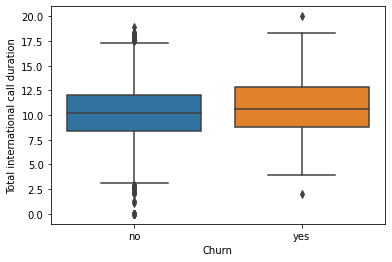

In [ ]:
# Plot the distribution of total_intl_minutes variable using boxplot
sns.boxplot(x="churn", y="total_intl_minutes", data=train).set(xlabel='Churn', ylabel='Total international call duration');

### Charge

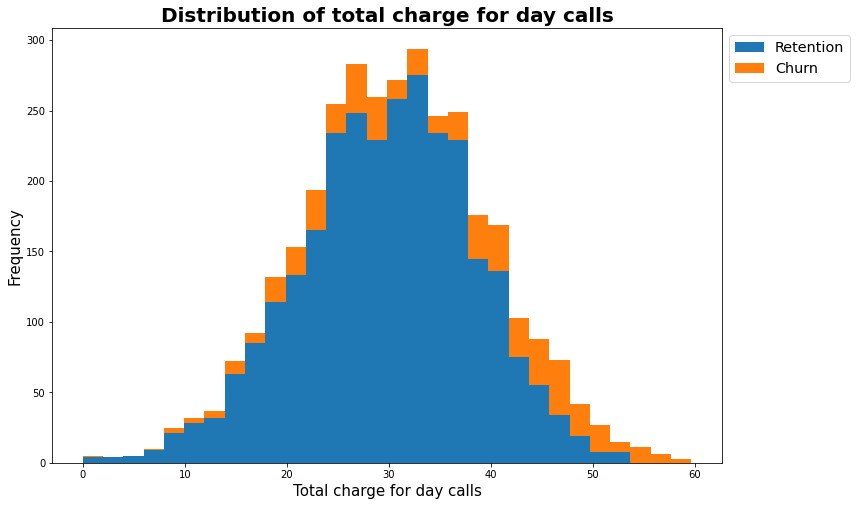

In [ ]:
# Plot the distribution of total_day_charge variable
plot_distribution(train, "total_day_charge", xlabel_="Total charge for day calls")

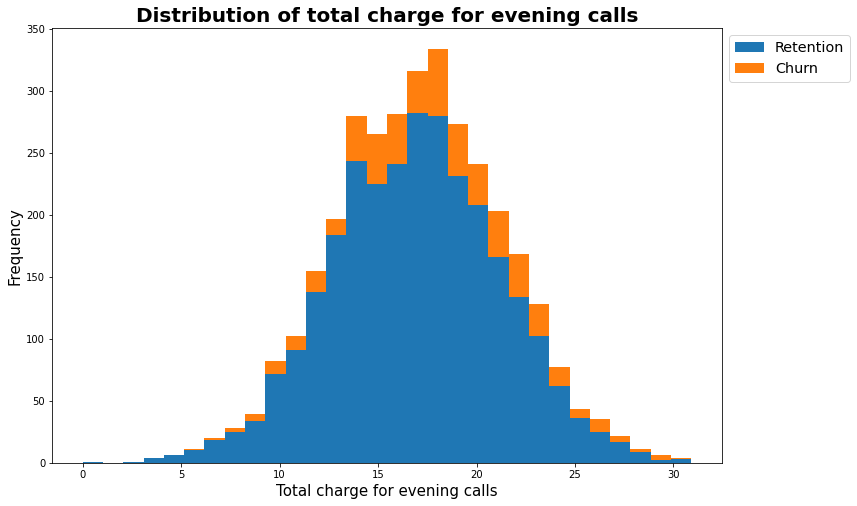

In [ ]:
# Plot the distribution of total_eve_charge variable
plot_distribution(train, "total_eve_charge", xlabel_="Total charge for evening calls")

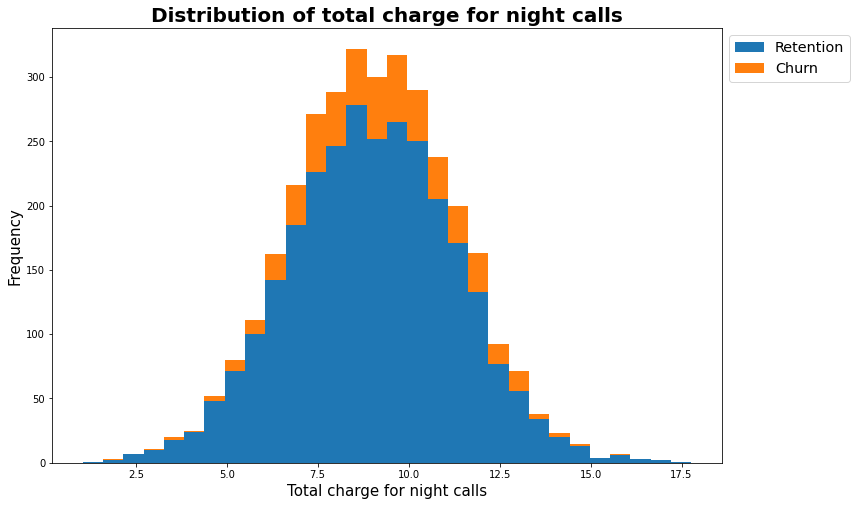

In [ ]:
# Plot the distribution of total_night_charge variable
plot_distribution(train, "total_night_charge", xlabel_="Total charge for night calls")

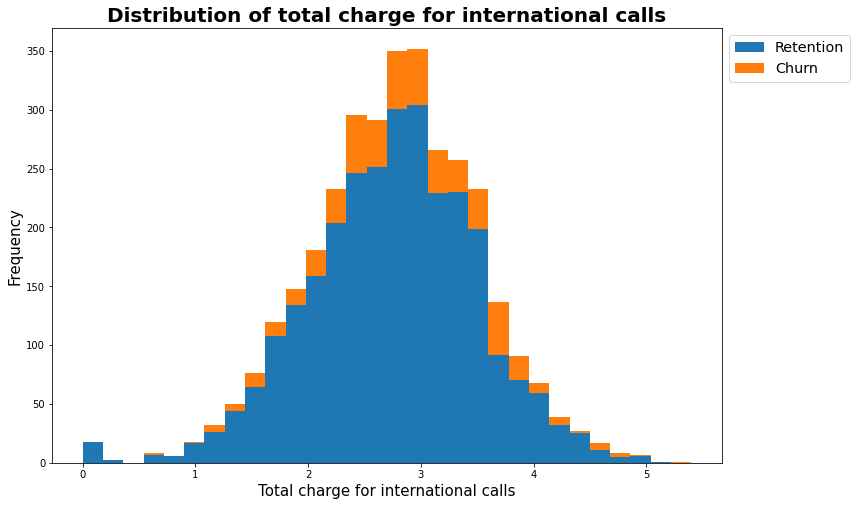

In [ ]:
# Plot the distribution of total_intl_charge variable
plot_distribution(train, "total_intl_charge", xlabel_="Total charge for international calls")

**Plot distribution using boxplot**

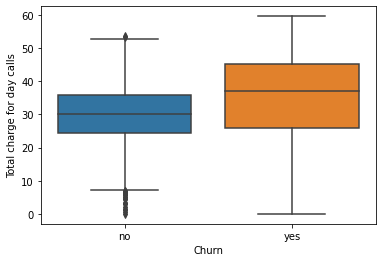

In [ ]:
# Plot the distribution of total_day_charge variable using boxplot
sns.boxplot(x="churn", y="total_day_charge", data=train).set(xlabel='Churn', ylabel='Total charge for day calls');

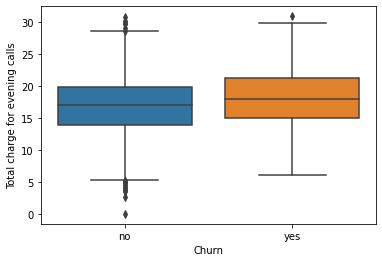

In [ ]:
# Plot the distribution of total_eve_charge variable using boxplot
sns.boxplot(x="churn", y="total_eve_charge", data=train).set(xlabel='Churn', ylabel='Total charge for evening calls');

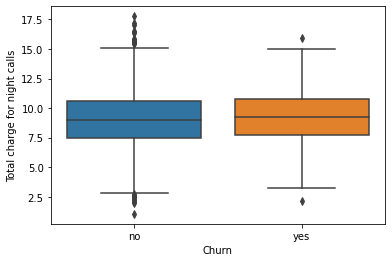

In [ ]:
# Plot the distribution of total_night_charge variable using boxplot
sns.boxplot(x="churn", y="total_night_charge", data=train).set(xlabel='Churn', ylabel='Total charge for night calls');

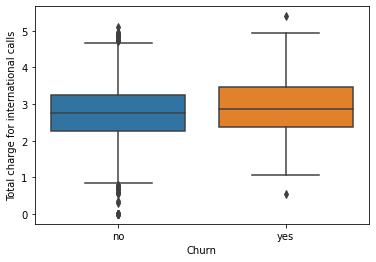

In [ ]:
# Plot the distribution of total_intl_charge variable using boxplot
sns.boxplot(x="churn", y="total_intl_charge", data=train).set(xlabel='Churn', ylabel='Total charge for international calls');

### Number of calls

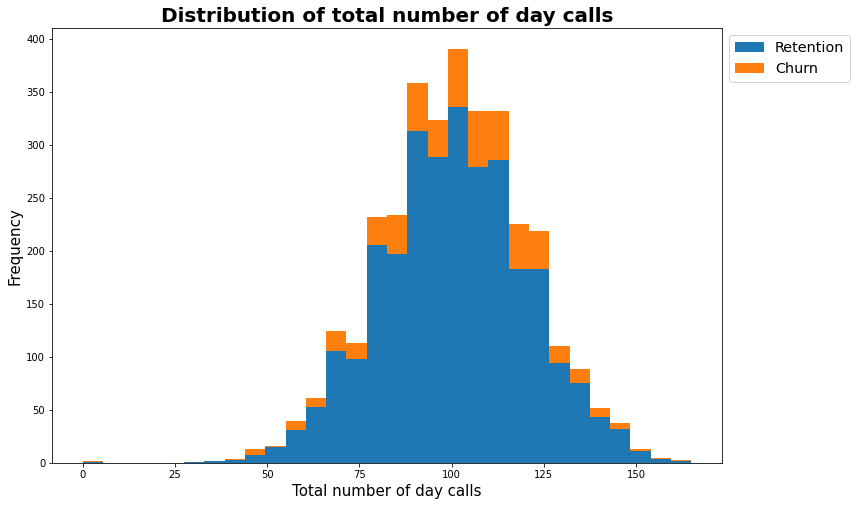

In [ ]:
# Plot the distribution of total_day_calls variable
plot_distribution(train, "total_day_calls", xlabel_="Total number of day calls")

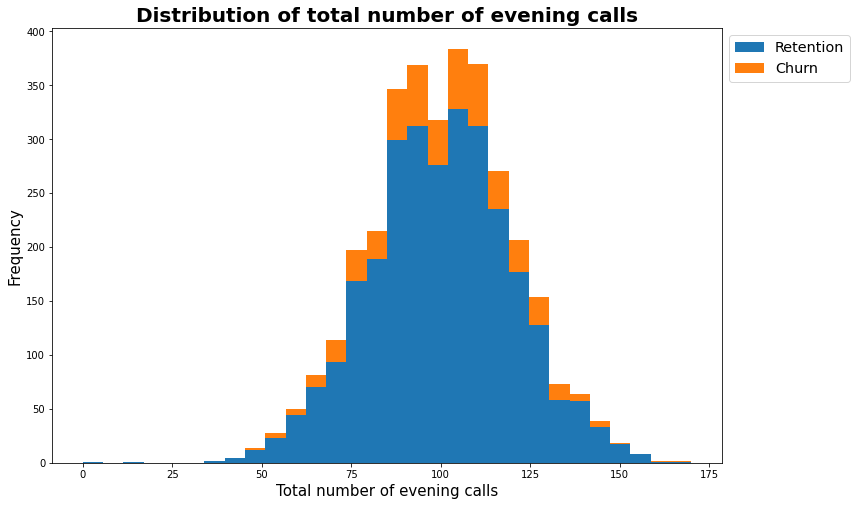

In [ ]:
# Plot the distribution of total_day_calls variable
plot_distribution(train, "total_eve_calls", xlabel_="Total number of evening calls")

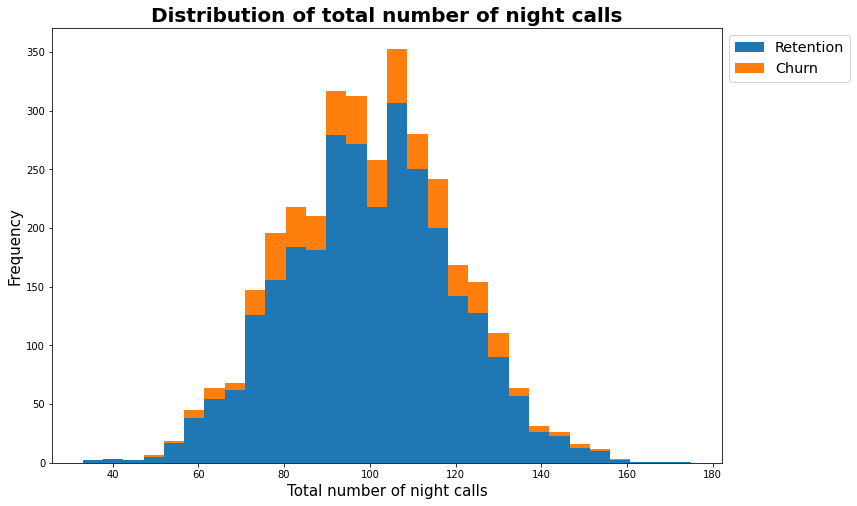

In [ ]:
# Plot the distribution of total_night_calls variable
plot_distribution(train, "total_night_calls", xlabel_="Total number of night calls")

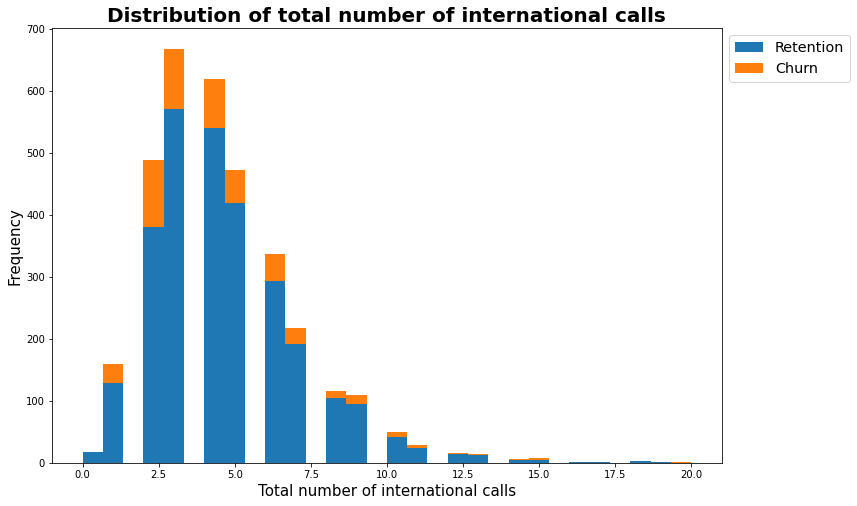

In [ ]:
# Plot the distribution of total_intl_calls variable
plot_distribution(train, "total_intl_calls", xlabel_="Total number of international calls")

**Plot distribution using boxplot**

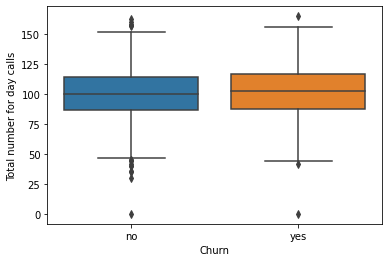

In [ ]:
# Plot the distribution of total_day_calls variable using boxplot
sns.boxplot(x="churn", y="total_day_calls", data=train).set(xlabel='Churn', ylabel='Total number for day calls');

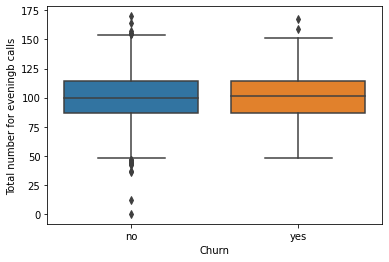

In [ ]:
# Plot the distribution of total_eve_calls variable using boxplot
sns.boxplot(x="churn", y="total_eve_calls", data=train).set(xlabel='Churn', ylabel='Total number for eveningb calls');

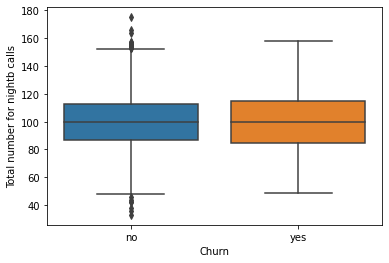

In [ ]:
# Plot the distribution of total_night_calls variable using boxplot
sns.boxplot(x="churn", y="total_night_calls", data=train).set(xlabel='Churn', ylabel='Total number for nightb calls');

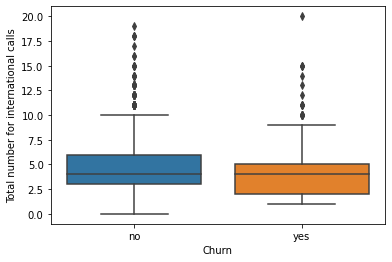

In [ ]:
# Plot the distribution of total_intl_calls variable using boxplot
sns.boxplot(x="churn", y="total_intl_calls", data=train).set(xlabel='Churn', ylabel='Total number for international calls');

### Others

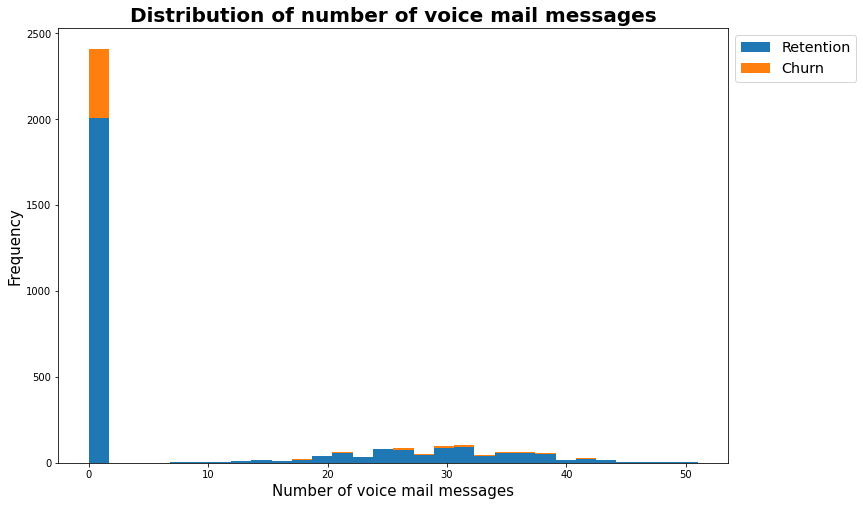

In [ ]:
# Plot the distribution of number_vmail_messages variable
plot_distribution(train, "number_vmail_messages", xlabel_="Number of voice mail messages")

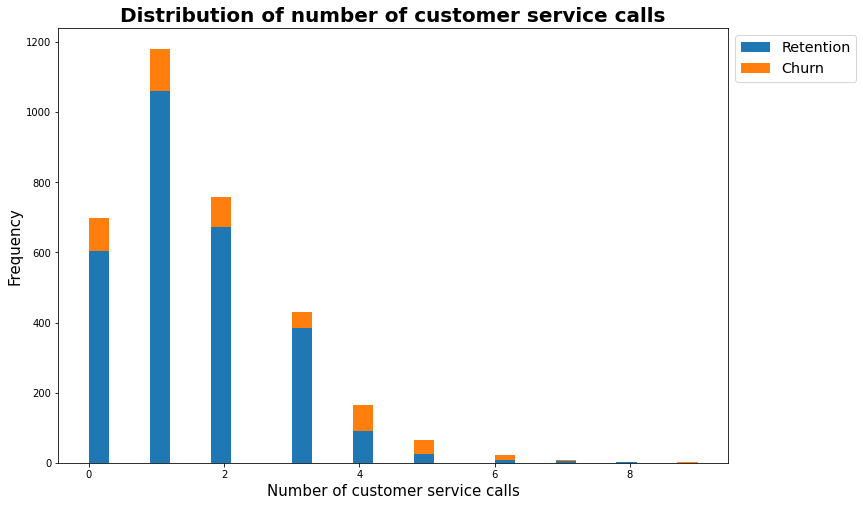

In [ ]:
# Plot the distribution of number_customer_service_calls variable
plot_distribution(train, "number_customer_service_calls", xlabel_="Number of customer service calls")

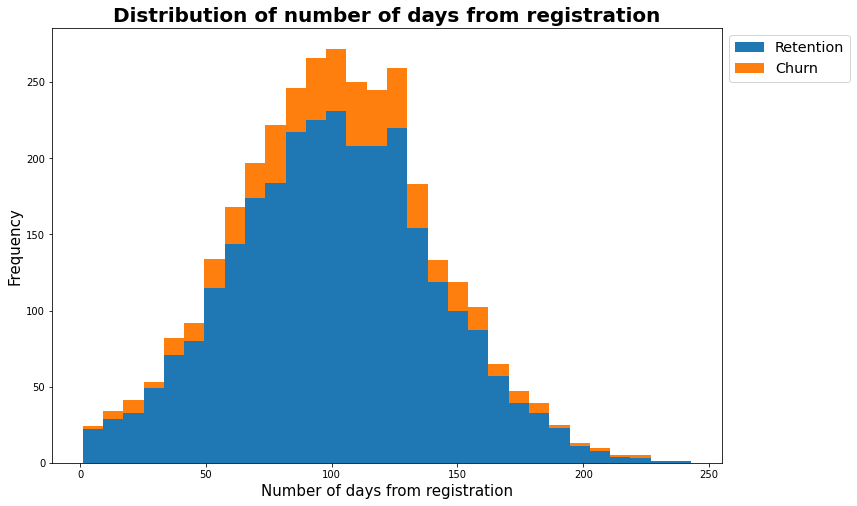

In [ ]:
# Plot the distribution of account_length variable
plot_distribution(train, "account_length", xlabel_="Number of days from registration")

**Plot distribution using boxplot**

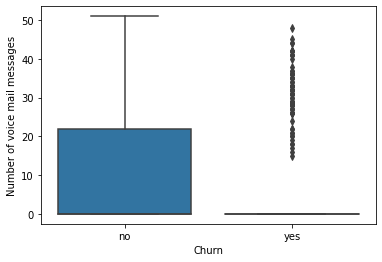

In [ ]:
# Plot the distribution of number_vmail_messages variable using boxplot
sns.boxplot(x="churn", y="number_vmail_messages", data=train).set(xlabel='Churn', ylabel='Number of voice mail messages');

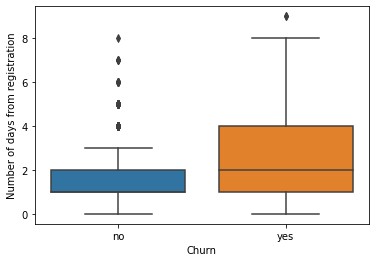

In [ ]:
# Plot the distribution of number_customer_service_calls variable using boxplot
sns.boxplot(x="churn", y="number_customer_service_calls", data=train).set(xlabel='Churn', ylabel='Number of days from registration');

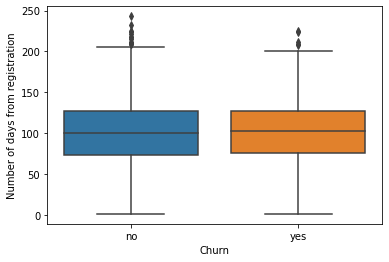

In [ ]:
# Plot the distribution of account_length variable using boxplot
sns.boxplot(x="churn", y="account_length", data=train).set(xlabel='Churn', ylabel='Number of days from registration');

# 4. Data Processing.

## Categorical data

### Collapse levels

In [ ]:
# Generate a dataframe that contains the count of each state
states_count = pd.DataFrame({"Number of records":train["state"].value_counts()})

# The number of states in the train data set
len(states_count)

51

Since there are 51 levels in the states variables with only a limited number of samples, we need to collapse levels of the state variable. We decided to collapse the variable by region.

In [ ]:
# Source: https://www.kaggle.com/giodev11/usstates-dataset
# A data set retrieved from Kaggle that contains state and region column
states = pd.read_csv("/.../states.csv")
states.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [ ]:
# Merge the states data set with both train and test data set
train = pd.merge(train, states[['State Code', 'Region']], left_on='state', right_on='State Code', how='left')
test = pd.merge(test, states[['State Code', 'Region']], left_on='state', right_on='State Code', how='left')

In [ ]:
# Check the number of missing value of the state code column
pd.DataFrame({"Missing values (%)": train[['Region']].isnull().sum()/len(train.index)*100})

,Missing values (%)
Region,0.0


In [ ]:
# Transform data type
pd.DataFrame({"Number of records":train["Region"].value_counts()})

,Number of records
South,1109
West,831
Midwest,802
Northeast,591


In [ ]:
# Drop the state, State Code, and id columns
train.drop(['state', 'State Code', 'id'], axis = 1, inplace=True)
test.drop(['state', 'State Code'], axis = 1, inplace=True)

In [ ]:
# Reorder Region column to be the first column
cols = train.columns.tolist() # retrieve a list of column
cols = cols[-1:] + cols[:-1] # move the "Regionv" column to the first position in the cols list
train = train[cols] # reorder the columns of the train dataframe
test = test[cols] # reorder the columns of the train dataframe

In [ ]:
# Print the columns' name
train.columns, test.columns

(Index(['Region', 'account_length', 'area_code', 'international_plan',
        'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
        'total_day_calls', 'total_day_charge', 'total_eve_minutes',
        'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
        'total_night_calls', 'total_night_charge', 'total_intl_minutes',
        'total_intl_calls', 'total_intl_charge',
        'number_customer_service_calls', 'churn'],
       dtype='object'),
 Index(['Region', 'account_length', 'area_code', 'international_plan',
        'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
        'total_day_calls', 'total_day_charge', 'total_eve_minutes',
        'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
        'total_night_calls', 'total_night_charge', 'total_intl_minutes',
        'total_intl_calls', 'total_intl_charge',
        'number_customer_service_calls', 'churn'],
       dtype='object'))

### Create dummy variables

In [ ]:
# Select categorical columns
cat_vars = [c for c in train.columns if train[c].dtypes == "object"]

# Delete response variable out of the list
cat_vars.pop()
print('Categories', cat_vars)

Categories ['Region', 'area_code', 'international_plan', 'voice_mail_plan']


In [ ]:
def create_dummies(training, testing, column, removedColumn, prefix_=""):
  '''
  Create dummy variables for a categorical variable and return a new traing and 
  test set that includes dummy variables
  '''

  # Create dummy columns
  dummies_train = pd.get_dummies(training[column], prefix = prefix_)
  dummies_test = pd.get_dummies(testing[column], prefix = prefix_)

  # Choose 1 base column and drop it
  dummies_train.drop(columns=[removedColumn],inplace=True)
  dummies_test.drop(columns=[removedColumn],inplace=True)
  
  # Merge a created dummy dataframe to the original dataframe
  training = pd.merge(training, dummies_train, left_index=True, right_index=True)
  testing = pd.merge(testing, dummies_test, left_index=True, right_index=True)

  # Drop the original columns out of the training and testing dataframe
  training.drop(columns=[column],inplace=True)
  testing.drop(columns=[column],inplace=True)

  return training, testing

In [ ]:
train, test = create_dummies(train, test, "Region", "region_West", "region")
train, test = create_dummies(train, test, "area_code", "_area_code_415")
train, test = create_dummies(train, test, "international_plan", "international_plan_no", "international_plan")
train, test = create_dummies(train, test, "voice_mail_plan", "voice_mail_plan_no", "voice_mail_plan")

In [ ]:
train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,region_Midwest,region_Northeast,region_South,_area_code_408,_area_code_510,international_plan_yes,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no,1,0,0,0,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,1,0,0,0,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0,1,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,1,0,0,1,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,0,0,1,0,0,1,0


In [ ]:
train.columns, test.columns

(Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
        'total_day_calls', 'total_day_charge', 'total_eve_minutes',
        'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
        'total_night_calls', 'total_night_charge', 'total_intl_minutes',
        'total_intl_calls', 'total_intl_charge',
        'number_customer_service_calls', 'churn', 'region_Midwest',
        'region_Northeast', 'region_South', '_area_code_408', '_area_code_510',
        'international_plan_yes', 'voice_mail_plan_yes'],
       dtype='object'),
 Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
        'total_day_calls', 'total_day_charge', 'total_eve_minutes',
        'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
        'total_night_calls', 'total_night_charge', 'total_intl_minutes',
        'total_intl_calls', 'total_intl_charge',
        'number_customer_service_calls', 'churn', 'region_Midwest',
        'region_Northeast', 'region_So

### Transform response variable

In [ ]:
# Replace no=0, yes=1 in the target variable
train['churn'].replace({'no': 0, 'yes': 1}, inplace=True)
test['churn'].replace({'no': 0, 'yes': 1}, inplace=True)

## Numeric Data

### High correlation variables

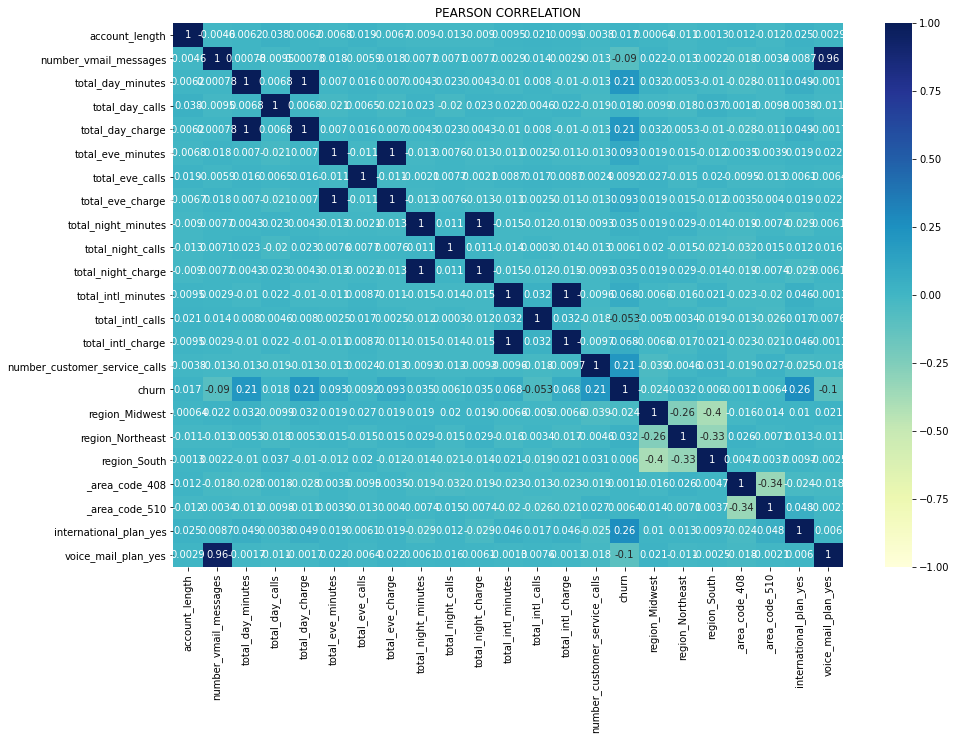

In [ ]:
# Plot linear correlation matrix of the train dataframe
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('PEARSON CORRELATION')
plt.show()

In order to avoid multicollinearity, we need to remove highly correlated variables. As expected, `total_day_minutes` is highly correlated with `total_day_charge`. We also observe a high correlation between `total_eve_minutes` and `total_eve_charge`, `total_night_minutes` and `total_night_charge`, `total_intl_minutes` and `total_intl_charge`, and `voice_mail_plan_yes` and `number_vmail_messages`. We decided to remove `total_day_minutes`, `total_eve_minutes`, `total_night_minutes`, `total_intl_minutes`, and `voice_mail_plan_yes` out of the train dataframe.



In [ ]:
# Drop columns
train.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', "voice_mail_plan_yes"], inplace=True)
test.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', "voice_mail_plan_yes"], inplace=True)

# 5. Modelling.

In [ ]:
# Specify predictors and target
X = train.drop(['churn'], axis=1)
y = train['churn']

In [ ]:
def upsample_and_train_model (model):
  '''
  A function first split the original train dataframe into a new training and validation set
  for 5 times (The split is conducted using KFold cross-validation method where k=5). An input
  model is fitted to each newly split training set after it is oversampled using SMOTE technique.
  The auc, recall, and fpr are then calculated and returned.
  '''

  # Define a list of fprs, tprs, auc score, a recall score
  # recall_scores and tprs scores variable have a different datatype
  fprs, tprs, auc_scores = [], [], []
  recall_scores = []

  # Define the parameter of KFold cross validation where k=5
  cv = KFold(n_splits=5, shuffle=True, random_state=42)
  # Define the smote object
  smote = SMOTE(random_state=99)

  for (train_ind, val_ind), i in zip(cv.split(X, y), range(5)):
    # Spilt the training and validation set
    X_train, X_val = X.iloc[train_ind], X.iloc[val_ind]
    y_train, y_val = y.iloc[train_ind], y.iloc[val_ind]
    
    # Oversample the minority class in the training set
    X_upsample, y_upsample = smote.fit_resample(X_train, y_train)

    # Fit an input model to the upsampled training set
    model.fit(X_upsample, y_upsample)

    # Calculate auc, tpr, and fpr based on the imbalanced validation set
    y_predict_val = model.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, _ = metrics.roc_curve(y_val, y_predict_val, pos_label=1)
    auc_score_val = metrics.auc(fpr_val, tpr_val)

    # Appends the calculated values to predefined lists
    auc_scores.append(auc_score_val)
    fprs.append(fpr_val)
    tprs.append(tpr_val)
    recall_scores.append(recall_score(y_val, np.where(y_predict_val > 0.5, 1, 0)))

  return fprs, tprs, auc_scores, recall_scores

## Random Forest Model

In [ ]:
# Define a random forest model
rf = RandomForestClassifier(n_estimators=150, random_state=99)
fprs_rf, tprs_rf, auc_scores_rf, recall_scores_rf = upsample_and_train_model(rf)

In [ ]:
print('Auc:', np.mean(auc_scores_rf))
print('Recall:', np.mean(recall_scores_rf))

Auc: 0.8641398125144303
Recall: 0.611177057997706


# Light GBM Model

In [ ]:
# Define a Light GBM model
lgbm = LGBMClassifier(random_state=99)
fprs_lgbm, tprs_lgbm, auc_scores_lgbm, recall_scores_lgbm = upsample_and_train_model(lgbm)

In [ ]:
print('Auc:', np.mean(auc_scores_lgbm))
print('Recall:', np.mean(recall_scores_lgbm))

Auc: 0.8894799451513695
Recall: 0.7584866714594208


## XGB Model

In [ ]:
# Define a XGB model
xgb_mod = xgb.XGBClassifier(random_state=99, learning_rate=0.1)
fprs_xgb, tprs_xgb, auc_scores_xgb, recall_scores_xgb = upsample_and_train_model(xgb_mod)

In [ ]:
print('Auc:', np.mean(auc_scores_xgb))
print('Recall:', np.mean(recall_scores_xgb))

Auc: 0.8742772253409793
Recall: 0.73259977671068


Based on the AUC and Recall Score, Light GBM Model was selected as the most "optimal" model among three models.

# 6. Model Tuning.

In [ ]:
# Define tuning parameters
parameter = {"num_leaves": [20, 30, 40],
             "max_depth": [5, 10, 15],
             "learning_rate": [0.005, 0.01, 0.1],
             "n_estimators":  [100, 150, 200]}

In [ ]:
# Define a list of best parameters
best_params = []

# Specify 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Specify a SMOTE object
smote = SMOTE(random_state=99)

for (train_ind, val_ind), i in zip(cv.split(X, y), range(5)):
  # Split the original train dataframe into a new train and validation set
  X_train, X_val = X.iloc[train_ind], X.iloc[val_ind]
  y_train, y_val = y.iloc[train_ind], y.iloc[val_ind]
  
  # Oversample the minority class in the training set
  X_upsample, y_upsample = smote.fit_resample(X_train, y_train)
  # Tune parameters
  lgbm_tuning = GridSearchCV(lgbm, parameter, n_jobs=-1, verbose=2).fit(X_upsample, y_upsample)

  # Chosen parameters
  best_param = lgbm_tuning.best_params_
  # Append to the predefined list
  best_params.append(best_param)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
best_params

[{'learning_rate': 0.1,
  'max_depth': 15,
  'n_estimators': 200,
  'num_leaves': 40},
 {'learning_rate': 0.1,
  'max_depth': 15,
  'n_estimators': 200,
  'num_leaves': 40},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 200,
  'num_leaves': 30},
 {'learning_rate': 0.1,
  'max_depth': 15,
  'n_estimators': 200,
  'num_leaves': 30},
 {'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 200,
  'num_leaves': 40}]

In [ ]:
'''
best_tuning_params1 = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'num_leaves': 40}
best_tuning_params2 = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'num_leaves': 40}
best_tuning_params3 = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 30}
best_tuning_params4 = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'num_leaves': 30}
best_tuning_params5 = {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 40}
'''
# Define 5 sets of best tuning parameter
best_tuning_params1 = best_params[0]
best_tuning_params2 = best_params[1]
best_tuning_params3 = best_params[2]
best_tuning_params4 = best_params[3]
best_tuning_params5 = best_params[4]

In [ ]:
# Define a light GBM based on the first tuning set
lgbm_tn1 = LGBMClassifier(**best_tuning_params1, random_state=99)
# Rerun the model
fprs_lgbm_tn1, tprs_lgbm_tn1, auc_scores_lgbm_tn1, recall_scores_lgbm_tn1 = upsample_and_train_model(lgbm_tn1)
print('Auc:', np.mean(auc_scores_lgbm_tn1))
print('Recall:', np.mean(recall_scores_lgbm_tn1))

Auc: 0.8839778417763297
Recall: 0.7200444828501721


In [ ]:
# Define a light GBM based on the second tuning set
lgbm_tn2 = LGBMClassifier(**best_tuning_params2, random_state=99)
# Rerun the model
fprs_lgbm_tn2, tprs_lgbm_tn2, auc_scores_lgbm_tn2, recall_scores_lgbm_tn2 = upsample_and_train_model(lgbm_tn2)
print('Auc:', np.mean(auc_scores_lgbm_tn2))
print('Recall:', np.mean(recall_scores_lgbm_tn2))

Auc: 0.8839778417763297
Recall: 0.7200444828501721


In [ ]:
# Define a light GBM based on the third tuning set
lgbm_tn3 = LGBMClassifier(**best_tuning_params3, random_state=99)
# Rerun the model
fprs_lgbm_tn3, tprs_lgbm_tn3, auc_scores_lgbm_tn3, recall_scores_lgbm_tn3 = upsample_and_train_model(lgbm_tn3)
print('Auc:', np.mean(auc_scores_lgbm_tn3))
print('Recall:', np.mean(recall_scores_lgbm_tn3))

Auc: 0.8853536075011286
Recall: 0.7344091724519644


In [ ]:
# Define a light GBM based on the fourth tuning set
lgbm_tn4 = LGBMClassifier(**best_tuning_params4, random_state=99)
# Rerun the model
fprs_lgbm_tn4, tprs_lgbm_tn4, auc_scores_lgbm_tn4, recall_scores_lgbm_tn4 = upsample_and_train_model(lgbm_tn4)
print('Auc:', np.mean(auc_scores_lgbm_tn4))
print('Recall:', np.mean(recall_scores_lgbm_tn4))

Auc: 0.8918513978603443
Recall: 0.7388378018105511


In [ ]:
# Define a light GBM based on the fifth tuning set
lgbm_tn5 = LGBMClassifier(**best_tuning_params5, random_state=99)
# Rerun the model
fprs_lgbm_tn5, tprs_lgbm_tn5, auc_scores_lgbm_tn5, recall_scores_lgbm_tn5 = upsample_and_train_model(lgbm_tn5)
print('Auc:', np.mean(auc_scores_lgbm_tn5))
print('Recall:', np.mean(recall_scores_lgbm_tn5))

Auc: 0.8858983751159679
Recall: 0.7310500864327919


# 7. Fit the final model to the test set

In [ ]:
X_test = test.drop(['churn'], axis=1)
y_test = test['churn']

In [ ]:
# Calculate scores based on the hold-out set
y_predict_test = lgbm.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_predict_test)
print('Auc:', auc_test)
print('Recall:', recall_score(y_test, np.where(y_predict_test > 0.5, 1, 0)))

Auc: 0.9109060984060985
Recall: 0.7455357142857143


## Confusion matrix

In [ ]:
# Actual y
actual_y = list(test['churn'])
# Predicted y
pred = np.where(y_predict_test > 0.5, 1, 0)

In [ ]:
# Confusion matrix
confusion_matrix(actual_y, pred)

array([[1341,  102],
       [  57,  167]])

In [ ]:
# TN, FP, FN, and TP
tn, fp, fn, tp = confusion_matrix(actual_y, pred).ravel()
(tn, fp, fn, tp)

(1341, 102, 57, 167)

## ROC curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.911


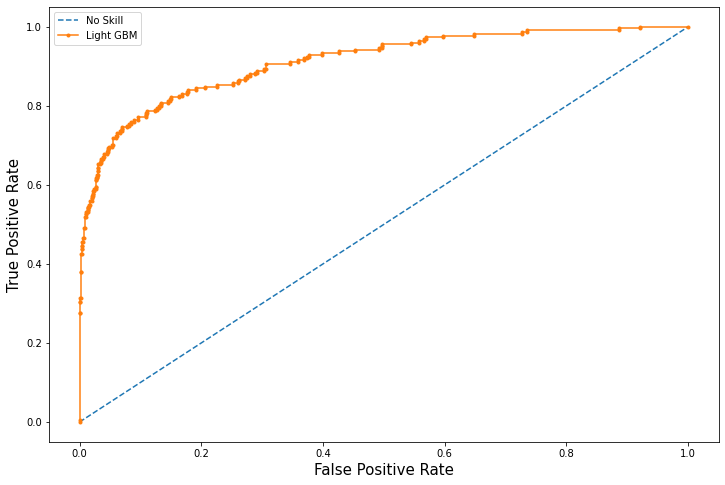

In [ ]:
# Source: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# Generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (auc_test))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label=1)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predict_test, pos_label=1)

# Plot the roc curve for the model
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Light GBM')

# Axis labels
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Gain Chart

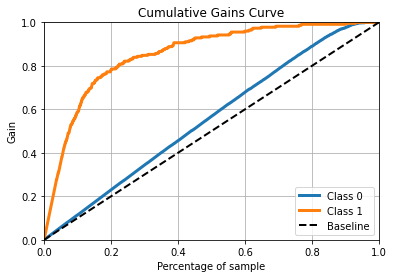

In [ ]:
# Predicted probability of each target's class when fitting models
predicted_probas = lgbm.predict_proba(X_test)

# Plot a gain chart
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

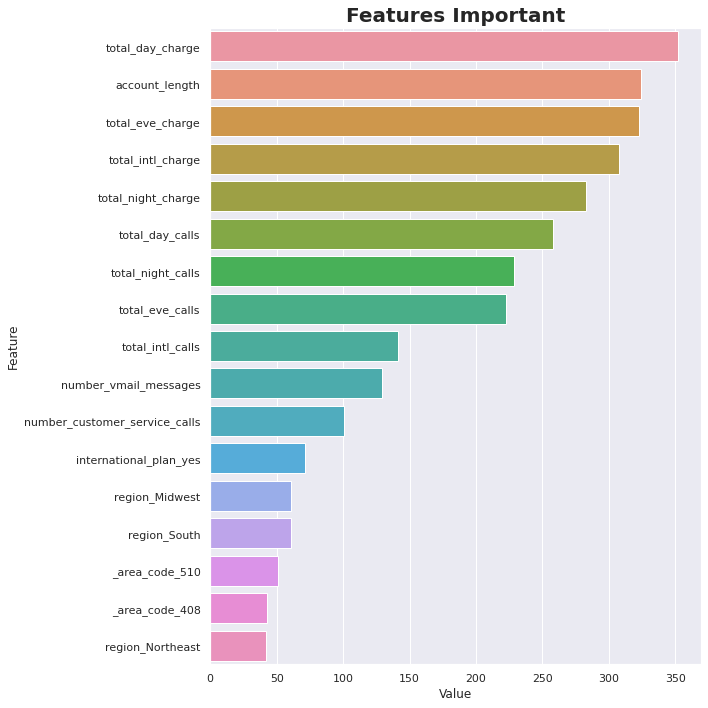

In [ ]:
# Source: https://www.kaggle.com/sevvalyurtekin/hr-analytics-job-change
def plot_importance(model, features, num=len(X_test)):
  '''
  Plot the importance of predictors in classify customer churn
  '''
  feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
  plt.figure(figsize=(10, 10))
  sns.set(font_scale=1)

  # Draw barplot
  sns.barplot(x="Value", y="Feature", 
              data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
  
  # Set title
  plt.title('Features Important', fontsize=20, fontweight="bold")
  plt.tight_layout()
  plt.show()

plot_importance(lgbm, X_test)